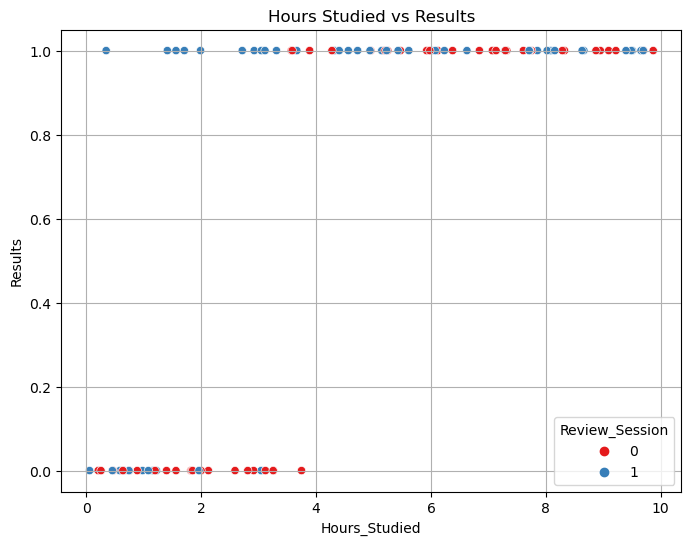

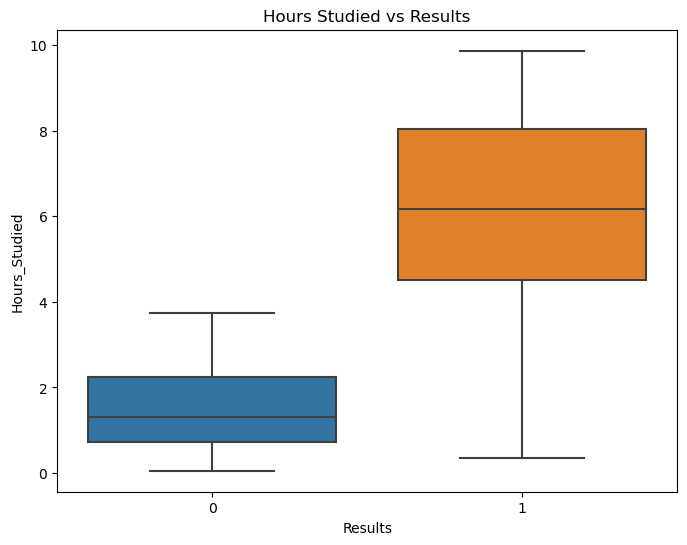


 Model Intercept (Bias): -4.6118
 Model Coefficients (Feature Weights):
  - Hours_Studied: 1.3650
  - Review_Session: 1.8773

 Model Accuracy: 93.00%

 Confusion Matrix:
 [[30  2]
 [ 5 63]]

 AUC Score: 0.976


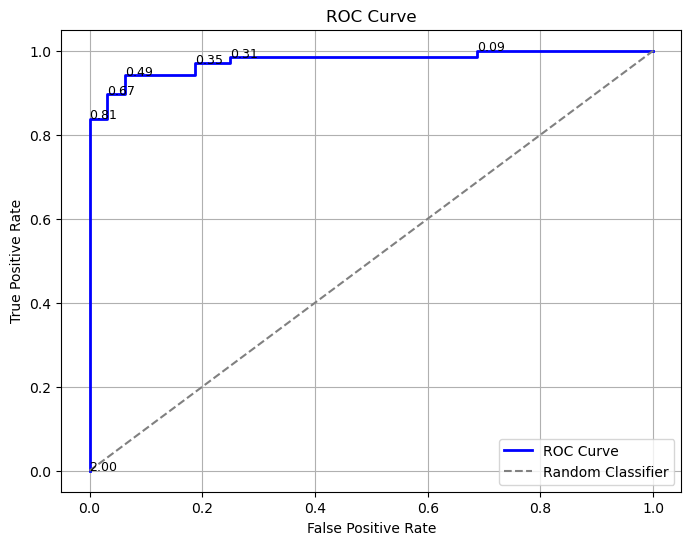

In [17]:
# Task 1b:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

data = pd.read_csv('/Users/m.sushanthreddy/Downloads/student_data.csv')

# (1): visualizing the data:

plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Hours_Studied', y='Results', hue='Review_Session', palette='Set1')
plt.title('Hours Studied vs Results')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Results', y='Hours_Studied')
plt.title('Hours Studied vs Results')
plt.show()


X = data[['Hours_Studied', 'Review_Session']] 
y = data['Results']

# (2): Fitting a model using logistic regression:

model = LogisticRegression()
model.fit(X, y)

# (3): Model coefficients and performance metrics:

print("\n Model Intercept (Bias): {:.4f}".format(model.intercept_[0]))
print(" Model Coefficients (Feature Weights):")
for feature, coef in zip(X.columns, model.coef_[0]):
    print(f"  - {feature}: {coef:.4f}")

y_pred = model.predict(X)
y_prob = model.predict_proba(X)[:, 1]

accuracy = accuracy_score(y, y_pred)
print("\n Model Accuracy: {:.2f}%".format(accuracy * 100))

cm = confusion_matrix(y, y_pred)
print("\n Confusion Matrix:\n", cm)

auc_score = roc_auc_score(y, y_prob)
print("\n AUC Score: {:.3f}".format(auc_score))

fpr, tpr, thresholds = roc_curve(y, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linestyle='-', color='b', lw=2, label="ROC Curve")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label="Random Classifier")
for i in range(0, len(fpr), int(len(fpr)/5)):
    plt.text(fpr[i], tpr[i], f'{thresholds[i]:.2f}', fontsize=9, color='black')
    
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [9]:
# Task 2:

import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('/Users/m.sushanthreddy/Downloads/student_data.csv')

X = data[['Hours_Studied', 'Review_Session']] 
y = data['Results']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#(1): Fitting SVM model with Linear Kernel

print(" Fitting SVM with Linear Kernel")
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_scaled, y)

y_pred_linear = svm_linear.predict(X_scaled)
accuracy_linear = accuracy_score(y, y_pred_linear)

print("\n Linear Kernel SVM Accuracy: {:.2f}%".format(accuracy_linear * 100))
print("\n Confusion Matrix (Linear Kernel):\n", confusion_matrix(y, y_pred_linear))
print("\n Classification Report (Linear Kernel):\n", classification_report(y, y_pred_linear))

#(2): Fitting SVM model with RBF Kernel

print("\n Fitting SVM model with RBF Kernel")

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1, 10]
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=kf, scoring='accuracy')

grid_search.fit(X_scaled, y)

print("\n Best Parameters (RBF Kernel):", grid_search.best_params_)
print(" Best Cross-Validation Accuracy: {:.2f}%".format(grid_search.best_score_ * 100))

best_rbf_svm = grid_search.best_estimator_
y_pred_rbf = best_rbf_svm.predict(X_scaled)
accuracy_rbf = accuracy_score(y, y_pred_rbf)

print("\n RBF Kernel SVM Accuracy (on full data): {:.2f}%".format(accuracy_rbf * 100))
print("\n Confusion Matrix (RBF Kernel):\n", confusion_matrix(y, y_pred_rbf))
print("\n Classification Report (RBF Kernel):\n", classification_report(y, y_pred_rbf))

 Fitting SVM with Linear Kernel

 Linear Kernel SVM Accuracy: 91.00%

 Confusion Matrix (Linear Kernel):
 [[30  2]
 [ 7 61]]

 Classification Report (Linear Kernel):
               precision    recall  f1-score   support

           0       0.81      0.94      0.87        32
           1       0.97      0.90      0.93        68

    accuracy                           0.91       100
   macro avg       0.89      0.92      0.90       100
weighted avg       0.92      0.91      0.91       100


 Fitting SVM model with RBF Kernel

 Best Parameters (RBF Kernel): {'C': 10, 'gamma': 10}
 Best Cross-Validation Accuracy: 95.00%

 RBF Kernel SVM Accuracy (on full data): 96.00%

 Confusion Matrix (RBF Kernel):
 [[29  3]
 [ 1 67]]

 Classification Report (RBF Kernel):
               precision    recall  f1-score   support

           0       0.97      0.91      0.94        32
           1       0.96      0.99      0.97        68

    accuracy                           0.96       100
   macro avg    